# Filter Merged CDAW/LASCO CME Event & Non-event Catalogs
This notebook is for pulling out training datasets from the event and non-event merged CDAW/LASCO catalogs.

In [1]:
import requests
import pandas as pd

LASCO_Catalog_Filename = '../lasco_img_catalog_lvl_1.txt'
CME_Catalog_Filename = '../cme_event_catalog.txt'

#Merged_Catalog_Filename = '../cme_events.csv'
Merged_Catalog_Filename = '../merged_cdaw_lasco_catalog.csv'

C2_non_CME_Catalog_Filename = '../c2_non_events.csv'
C3_non_CME_Catalog_Filename = '../c3_non_events.csv'

# the number of files, sequentially, which we will difference
File_Seq_Size = 10

In [2]:
cme_data = pd.read_csv(Merged_Catalog_Filename)
#cme_data = cme_data.drop('Unnamed: 0', axis=1)
cme_data

/home/thomas/Work/NASA/Code/cdaw_cme_catalog_analysis/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
0,0,22000294.fts,C2,1024,1024,Orange,Clear,1996-01-31 08:01:38,25.4,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
1,1,22000295.fts,C2,1024,1024,Orange,Clear,1996-01-31 09:11:14,25.1,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
2,2,22000296.fts,C2,1024,1024,Orange,Clear,1996-01-31 10:20:39,25.1,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
3,3,22000297.fts,C2,1024,1024,Orange,Clear,1996-01-31 11:30:19,25.9,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
4,4,22000298.fts,C2,1024,1024,Orange,Clear,1996-01-31 12:40:17,25.1,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574731,574731,32633227.fts,C3,1024,1024,Clear,Clear,2020-09-01 03:18:05,17.6,2020/09/01,...,53,213,30480,32645092.fts,1024,1024,Clear,2019-10-30 23:42:05,17.9,Clear
574732,574732,32633228.fts,C3,1024,1024,Clear,Clear,2020-09-01 03:30:05,17.8,2020/09/01,...,53,213,30480,32645092.fts,1024,1024,Clear,2019-10-30 23:42:05,17.9,Clear
574733,574733,32633229.fts,C3,1024,1024,Clear,Clear,2020-09-01 03:42:05,17.6,2020/09/01,...,53,213,30480,32645092.fts,1024,1024,Clear,2019-10-30 23:42:05,17.9,Clear
574734,574734,32633230.fts,C3,1024,1024,Clear,Clear,2020-09-01 03:54:07,17.6,2020/09/01,...,53,213,30480,32645092.fts,1024,1024,Clear,2019-10-30 23:42:05,17.9,Clear


In [3]:
# function to get unique values 
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list
      

In [4]:
# test it out, try to pull a few intervals for events
C2_data = cme_data[cme_data['telescope']=='C2']
C2_data

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
0,0,22000294.fts,C2,1024,1024,Orange,Clear,1996-01-31 08:01:38,25.4,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
1,1,22000295.fts,C2,1024,1024,Orange,Clear,1996-01-31 09:11:14,25.1,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
2,2,22000296.fts,C2,1024,1024,Orange,Clear,1996-01-31 10:20:39,25.1,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
3,3,22000297.fts,C2,1024,1024,Orange,Clear,1996-01-31 11:30:19,25.9,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
4,4,22000298.fts,C2,1024,1024,Orange,Clear,1996-01-31 12:40:17,25.1,1996/01/31,...,47,158,5,22000292.fts,1024,1024,Orange,1996-01-31 05:42:43,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574621,574621,22782363.fts,C2,1024,1024,Orange,Clear,2020-08-31 06:48:05,25.2,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574622,574622,22782364.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:00:05,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574623,574623,22782365.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:12:05,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574624,574624,22782366.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:24:06,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear


In [5]:
# remove events which have poor data OR are different type ("Halo")
slice1 = C2_data
#for filter in ['Only 3 points', 'Only 2 points', 'Poor Event', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
for filter in ['Very Poor Event', 'Only 2 points', 'Only 3 points', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
    slice1 = slice1[~slice1['Remarks'].str.contains(filter, regex=True)]
slice1

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
26,26,22000487.fts,C2,1024,1024,Orange,Clear,1996-02-12 07:01:57,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
27,27,22000488.fts,C2,1024,1024,Orange,Clear,1996-02-12 08:16:27,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
28,28,22000489.fts,C2,1024,1024,Orange,Clear,1996-02-12 09:30:48,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
29,29,22000490.fts,C2,1024,1024,Orange,Clear,1996-02-12 10:45:46,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
30,30,22000491.fts,C2,1024,1024,Orange,Clear,1996-02-12 12:00:22,13.8,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574621,574621,22782363.fts,C2,1024,1024,Orange,Clear,2020-08-31 06:48:05,25.2,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574622,574622,22782364.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:00:05,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574623,574623,22782365.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:12:05,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574624,574624,22782366.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:24:06,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear


In [6]:
slice1.sort_values('Linear', ascending=True)[:1]

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
109325,109325,22249162.fts,C2,576,416,Orange,Clear,2007-03-15 09:38:04,0.1,2007/03/15,...,29,38,11950,22249112.fts,576,416,Orange,2007-03-15 00:14:08,0.1,Clear


In [7]:
slice1.sort_values('Linear', ascending=False)[:1]

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
84534,84534,22187907.fts,C2,1024,1024,Orange,Clear,2005-01-17 10:06:05,25.1,2005/01/17,...,360,2547,9473,22187905.fts,1024,1024,Orange,2005-01-17 09:30:05,26.0,Clear


In [8]:
ids = list(slice1['CDAW_Id'])
foo = unique(ids)
len(foo)

5606

In [9]:
#slice1['CDAW_Id'][:20]

In [10]:
#cme_event = slice1[slice1['CDAW_Id']==428]
#cme_event

In [11]:
#list(cme_event['filename']) #.to_string()

In [12]:
# how many files if we isolate 1024x1024 images
slice2 = slice1
slice2 = slice2[slice2['NumCols']==1024]
slice2 = slice2[slice2['NumRows']==1024]
slice2

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
26,26,22000487.fts,C2,1024,1024,Orange,Clear,1996-02-12 07:01:57,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
27,27,22000488.fts,C2,1024,1024,Orange,Clear,1996-02-12 08:16:27,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
28,28,22000489.fts,C2,1024,1024,Orange,Clear,1996-02-12 09:30:48,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
29,29,22000490.fts,C2,1024,1024,Orange,Clear,1996-02-12 10:45:46,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
30,30,22000491.fts,C2,1024,1024,Orange,Clear,1996-02-12 12:00:22,13.8,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574621,574621,22782363.fts,C2,1024,1024,Orange,Clear,2020-08-31 06:48:05,25.2,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574622,574622,22782364.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:00:05,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574623,574623,22782365.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:12:05,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
574624,574624,22782366.fts,C2,1024,1024,Orange,Clear,2020-08-31 07:24:06,25.1,2020/08/31,...,53,213,30480,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear


In [13]:
ids = list(slice2['CDAW_Id'])
len(unique(ids))

5583

In [14]:
filts = list(slice2['Filter'])
print(unique(filts))

['H alph', 'Orange', 'DeepRd', 'Blue']


In [15]:
#  Isolate events where we have 'campaign mode' (e.g. strange image sizes)
slice3 = slice1
slice3 = slice3[slice3['NumCols']!=1024]
slice3 = slice3[slice3['NumRows']!=1024]
campaign_ids = unique(list(slice3['CDAW_Id']))
print (len(campaign_ids))
#sorted(campaign_ids)

3052


In [16]:
# cleaned list of general CMEs is now (campaign mode subtracted out)
cleaned = slice2[~slice2['CDAW_Id'].isin(campaign_ids)]
cleaned

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
26,26,22000487.fts,C2,1024,1024,Orange,Clear,1996-02-12 07:01:57,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
27,27,22000488.fts,C2,1024,1024,Orange,Clear,1996-02-12 08:16:27,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
28,28,22000489.fts,C2,1024,1024,Orange,Clear,1996-02-12 09:30:48,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
29,29,22000490.fts,C2,1024,1024,Orange,Clear,1996-02-12 10:45:46,25.1,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
30,30,22000491.fts,C2,1024,1024,Orange,Clear,1996-02-12 12:00:22,13.8,1996/02/12,...,53,160,8,22000485.fts,1024,1024,Orange,1996-02-12 04:32:50,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572339,572339,22779548.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:36:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572340,572340,22779549.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:48:06,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572341,572341,22779550.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:00:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572342,572342,22779551.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:12:05,25.6,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear


In [17]:
ids = unique(list(cleaned['CDAW_Id']))
len(ids)

2541

In [18]:
# Remove events where they have only one file associated with it
result = cleaned.groupby('CDAW_Id', sort=False).count()
#result[result['CDAW_Id']=='8']
result['filename']


CDAW_Id
8         5
12        9
16        3
37        4
38        8
         ..
30052    15
30124    25
30329    28
30346    22
30427    23
Name: filename, Length: 2541, dtype: int64

Text(0, 0.5, 'Frequency')

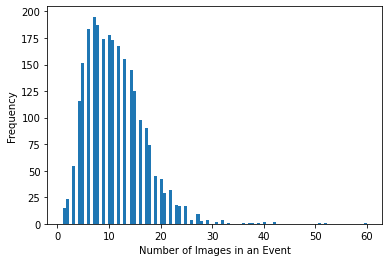

In [19]:
# plot number distribution of events
import matplotlib.pyplot as plt
result['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")
#plt.set(xlabel="foo")

Text(0, 0.5, 'Frequency')

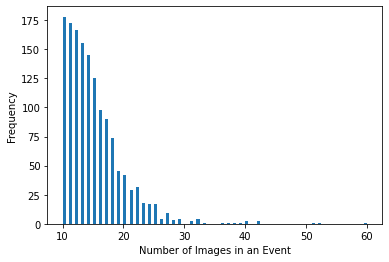

In [20]:
# find the number of events where we have File_Seq_Size or more files (images)
# we will train on first 5 differenced images
events_with_sufficent_images = result[result['filename']>=File_Seq_Size]
events_with_sufficent_images ['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")

#events_with_sufficent_images

In [21]:
#filter for the events with sufficent images now
esi_ids = list(events_with_sufficent_images.index)

cleaned2 = cleaned[cleaned['CDAW_Id'].isin(esi_ids)]
cleaned2

#esi_ids

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
2799,2799,22011722.fts,C2,1024,1024,Orange,Clear,1997-04-11 02:28:09,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2800,2800,22011723.fts,C2,1024,1024,Orange,Clear,1997-04-11 02:59:39,25.2,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2801,2801,22011724.fts,C2,1024,1024,Orange,Clear,1997-04-11 03:21:27,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2802,2802,22011725.fts,C2,1024,1024,Orange,Clear,1997-04-11 03:52:44,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2803,2803,22011726.fts,C2,1024,1024,Orange,Clear,1997-04-11 04:14:21,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572339,572339,22779548.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:36:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572340,572340,22779549.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:48:06,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572341,572341,22779550.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:00:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572342,572342,22779551.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:12:05,25.6,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear


<AxesSubplot:ylabel='Frequency'>

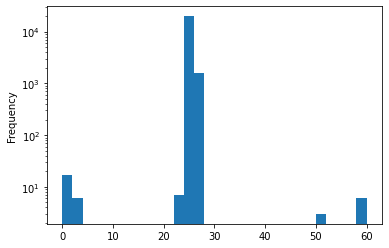

In [22]:
# examine exposure times
cleaned2['expTime'].plot.hist(logy=True, bins=30)

In [23]:
# get rid of exposure times which are not nominal (e.g. 25.1)
lower_exptime = 24.75
upper_exptime = 27.5

slice4 = cleaned2
slice4 = slice4[slice4['expTime']>= upper_exptime]

slice5 = cleaned2
slice5 = slice5[slice5['expTime']<= lower_exptime]

poor_exposure_ids = list(slice4['CDAW_Id'])
poor_exposure_ids.extend(list(slice5['CDAW_Id']))
poor_exposure_ids = unique (poor_exposure_ids)
len(poor_exposure_ids)

22

In [24]:
cleaned3 = cleaned2[~cleaned2['CDAW_Id'].isin(poor_exposure_ids)]
cleaned3

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
2799,2799,22011722.fts,C2,1024,1024,Orange,Clear,1997-04-11 02:28:09,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2800,2800,22011723.fts,C2,1024,1024,Orange,Clear,1997-04-11 02:59:39,25.2,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2801,2801,22011724.fts,C2,1024,1024,Orange,Clear,1997-04-11 03:21:27,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2802,2802,22011725.fts,C2,1024,1024,Orange,Clear,1997-04-11 03:52:44,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2803,2803,22011726.fts,C2,1024,1024,Orange,Clear,1997-04-11 04:14:21,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572339,572339,22779548.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:36:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572340,572340,22779549.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:48:06,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572341,572341,22779550.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:00:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572342,572342,22779551.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:12:05,25.6,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear


In [25]:
# filter polarizer, Filter to be consistent
C2_Filter = 'Orang'
C2_Polarizer = 'Clear'
cleaned3 = cleaned3[cleaned3['Filter'].str.match(C2_Filter)]
cleaned3 = cleaned3[cleaned3['Polarizer'].str.match(C2_Polarizer)]
cleaned3 = cleaned3[cleaned3['bkgnd_Filter'].str.match(C2_Filter)]
cleaned3 = cleaned3[cleaned3['bkgnd_Polarizer'].str.match(C2_Polarizer)]
cleaned3

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
2799,2799,22011722.fts,C2,1024,1024,Orange,Clear,1997-04-11 02:28:09,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2800,2800,22011723.fts,C2,1024,1024,Orange,Clear,1997-04-11 02:59:39,25.2,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2801,2801,22011724.fts,C2,1024,1024,Orange,Clear,1997-04-11 03:21:27,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2802,2802,22011725.fts,C2,1024,1024,Orange,Clear,1997-04-11 03:52:44,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
2803,2803,22011726.fts,C2,1024,1024,Orange,Clear,1997-04-11 04:14:21,25.1,1997/04/11,...,41,155,276,22013210.fts,1024,416,Orange,1997-03-22 23:11:11,0.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572339,572339,22779548.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:36:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572340,572340,22779549.fts,C2,1024,1024,Orange,Clear,2020-08-07 19:48:06,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572341,572341,22779550.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:00:05,25.1,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear
572342,572342,22779551.fts,C2,1024,1024,Orange,Clear,2020-08-07 20:12:05,25.6,2020/08/07,...,16,244,30427,22795248.fts,1024,1024,Orange,2019-10-30 23:48:05,25.4,Clear


In [26]:
# now step through each CME event and keep only the first images
# as indicated by File_Seq_Size

cme_events = list(unique(cleaned3['CDAW_Id']))
filtered_data = {col:[] for col in cleaned3.columns}

for cme_event in cme_events:
    cme_data = cleaned3[cleaned3['CDAW_Id'] == cme_event]
    
    for row in cme_data[:File_Seq_Size].iterrows():
        for col in cleaned3.columns:
            filtered_data[col].append(row[1][col])
            
filtered_data = pd.DataFrame(filtered_data)
filtered_data

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
0,176950,22369759.fts,C2,1024,1024,Orange,Clear,2011-04-24 09:36:05,25.1,2011/04/24,...,40,406,16388,22793071.fts,1024,1024,Orange,2009-09-19 23:54:05,25.1,Clear
1,176951,22369760.fts,C2,1024,1024,Orange,Clear,2011-04-24 09:48:06,25.1,2011/04/24,...,40,406,16388,22793071.fts,1024,1024,Orange,2009-09-19 23:54:05,25.1,Clear
2,176952,22369761.fts,C2,1024,1024,Orange,Clear,2011-04-24 10:00:06,25.1,2011/04/24,...,40,406,16388,22793071.fts,1024,1024,Orange,2009-09-19 23:54:05,25.1,Clear
3,176953,22369762.fts,C2,1024,1024,Orange,Clear,2011-04-24 10:12:06,25.1,2011/04/24,...,40,406,16388,22793071.fts,1024,1024,Orange,2009-09-19 23:54:05,25.1,Clear
4,176954,22369763.fts,C2,1024,1024,Orange,Clear,2011-04-24 10:24:06,25.1,2011/04/24,...,40,406,16388,22793071.fts,1024,1024,Orange,2009-09-19 23:54:05,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,73296,22157934.fts,C2,1024,1024,Orange,Clear,2003-11-01 16:54:05,25.5,2003/11/01,...,55,334,8181,22157927.fts,1024,1024,Orange,2003-11-01 14:30:05,25.1,Clear
13196,73297,22157935.fts,C2,1024,1024,Orange,Clear,2003-11-01 17:06:07,25.1,2003/11/01,...,55,334,8181,22157927.fts,1024,1024,Orange,2003-11-01 14:30:05,25.1,Clear
13197,73298,22157936.fts,C2,1024,1024,Orange,Clear,2003-11-01 17:30:05,25.1,2003/11/01,...,55,334,8181,22157927.fts,1024,1024,Orange,2003-11-01 14:30:05,25.1,Clear
13198,73299,22157937.fts,C2,1024,1024,Orange,Clear,2003-11-01 17:54:05,25.1,2003/11/01,...,55,334,8181,22157927.fts,1024,1024,Orange,2003-11-01 14:30:05,25.1,Clear


<AxesSubplot:ylabel='Frequency'>

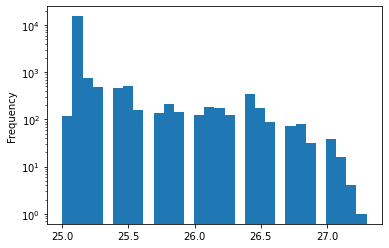

In [27]:
# examine exposure times
cleaned3['expTime'].plot.hist(logy=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

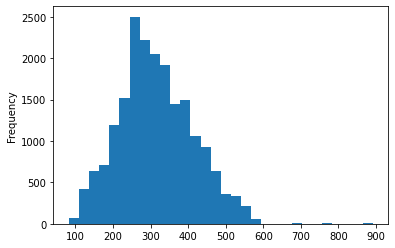

In [28]:
cleaned3['Linear'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

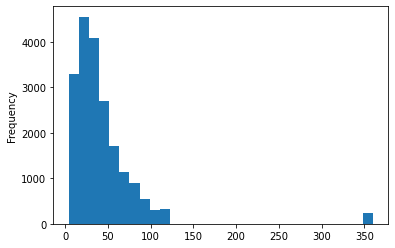

In [29]:
cleaned3['Width'].plot.hist(bins=30)

In [30]:
#write out list of dataset (postitive training)

training = filtered_data[['CDAW_Id','telescope', 'date-obs', 'datetime','filename']]
training.to_csv("../C2_positive_training_dataset.csv", index=None)
len(training)

13200

## Now build out a negative (non-CME) training dataset for both C2 and C3

In [38]:
# load non-event merged catalogs
c2_non_events = pd.read_csv(C2_non_CME_Catalog_Filename)
c3_non_events = pd.read_csv(C3_non_CME_Catalog_Filename)
c2_non_events

,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime
0,22706303.fts,2018-12-17 00:12:05,2018/12/17,1024,1024,Orange,Clear,25.3
1,22706304.fts,2018-12-17 00:24:05,2018/12/17,1024,1024,Orange,Clear,25.1
2,22706305.fts,2018-12-17 00:36:05,2018/12/17,1024,1024,Orange,Clear,25.1
3,22706306.fts,2018-12-17 00:48:05,2018/12/17,1024,1024,Orange,Clear,26.1
4,22706307.fts,2018-12-17 01:25:42,2018/12/17,1024,1024,Orange,Clear,25.1
...,...,...,...,...,...,...,...,...
9586,22717913.fts,2019-03-22 06:12:11,2019/03/22,1024,1024,Orange,Clear,25.3
9587,22717914.fts,2019-03-22 06:24:05,2019/03/22,1024,1024,Orange,Clear,25.1
9588,22717915.fts,2019-03-22 06:36:05,2019/03/22,1024,1024,Orange,Clear,25.9
9589,22717916.fts,2019-03-22 07:12:06,2019/03/22,1024,1024,Orange,Clear,25.1


In [39]:
filts = list(c2_non_events['Filter'])
print(unique(filts))

['Orange', 'DeepRd', 'Blue']


In [40]:
# apply the same filter/constraints as for CME event data 
def filter_data(data:pd.DataFrame, filtername:str, polarizer:str)->pd.DataFrame:

    slice1 = data
    
    # only 1024x1024
    slice1 = slice1[slice1['NumRows']==1024]
    slice1 = slice1[slice1['NumCols']==1024]
    
    # only right exptimes
    slice1 = slice1[slice1['expTime'] <= upper_exptime]
    slice1 = slice1[slice1['expTime'] >= lower_exptime]
    
    slice1 = slice1[slice1['Filter'].str.match(filtername)]
    slice1 = slice1 [slice1['Polarizer'].str.match(polarizer)]
    
    # TODO?: filter by time window (start year, stop year)
    # where we drew CME events from (to better match non-CME
    # activity of sun in same period)
    
    return slice1

c2_ne = filter_data(c2_non_events, C2_Filter, C2_Polarizer)
c2_ne

,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime
0,22706303.fts,2018-12-17 00:12:05,2018/12/17,1024,1024,Orange,Clear,25.3
1,22706304.fts,2018-12-17 00:24:05,2018/12/17,1024,1024,Orange,Clear,25.1
2,22706305.fts,2018-12-17 00:36:05,2018/12/17,1024,1024,Orange,Clear,25.1
3,22706306.fts,2018-12-17 00:48:05,2018/12/17,1024,1024,Orange,Clear,26.1
4,22706307.fts,2018-12-17 01:25:42,2018/12/17,1024,1024,Orange,Clear,25.1
...,...,...,...,...,...,...,...,...
9586,22717913.fts,2019-03-22 06:12:11,2019/03/22,1024,1024,Orange,Clear,25.3
9587,22717914.fts,2019-03-22 06:24:05,2019/03/22,1024,1024,Orange,Clear,25.1
9588,22717915.fts,2019-03-22 06:36:05,2019/03/22,1024,1024,Orange,Clear,25.9
9589,22717916.fts,2019-03-22 07:12:06,2019/03/22,1024,1024,Orange,Clear,25.1


<AxesSubplot:ylabel='Frequency'>

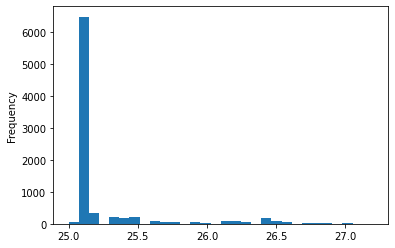

In [41]:
c2_ne['expTime'].plot.hist(bins=30)

In [42]:
len(sorted(unique(list(c2_ne['date-obs']))))

83

In [45]:
import random

def random_sample(non_cme_data, cme_data:pd.DataFrame, size:int=File_Seq_Size)->pd.DataFrame:
    
    # randomly sample out X dates which have size (File_Seq_Size) or more observations
    # X = number of CME events for which we have size or more observations
    num_cme_events = len(unique(list(cme_data['CDAW_Id'])))

    date_list = unique(list(cme_data['date-obs']))
    
    print(num_cme_events, len(date_list))

    random_data = { col:[] for col in non_cme_data.columns }

    found_obs = 0
    # use random sample to pick random dates to get non event data from. We
    # multiply cme event number by small factor to allow for possible short intervals we cannot use
    for date in random.sample(date_list, int(num_cme_events * 1.1)): 
        if found_obs >= num_cme_events:
            # end when we match number of cme events
            print('matched number of cme events')
            break

        # pull data for this date
        date_data = non_cme_data[non_cme_data['date-obs'] == date]

        # check if its got File_Seq_Size or more files available
        if len(date_data) >= size:
            # it has sufficent, so cache it
            for row in date_data[:size].iterrows():
                for col in non_cme_data.columns:
                    random_data[col].append(row[1][col])

            found_obs += 1
            
    return pd.DataFrame(random_data)

c2_non_event_random_data = random_sample(non_cme_data=c2_ne, cme_data=cleaned3, size=File_Seq_Size)

c2_non_event_random_data

1320 1236


ValueError: Sample larger than population or is negative

In [ ]:
# include date-obs in this dataset so we can use it downstream as a type of non event 'id'
final_c2_non_event = c2_non_event_random_data[['datetime', 'date-obs', 'telescope', 'filename']]
final_c2_non_event.to_csv("../C2_negative_training_dataset.csv", index=None)

In [ ]:
final_c2_non_event